<a href="https://colab.research.google.com/github/Swayamprakashpatel/IR_Tablet/blob/main/IR_Tablet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [40]:
# Assuming you have the dataset in a CSV file named 'data.csv'
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.',], axis = 1)


In [ ]:


# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2] # Binder Type and Disintegrant type
X2 = X.iloc[:, 2:4].apply(pd.to_numeric, errors='coerce') / 10 # Disintegrant and binder amount
X3 = X.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce') / 100 # Mannitola and MCC amount
X4 = X.iloc[:, 6:7].apply(pd.to_numeric, errors='coerce') / 20 # Punch Size
X5 = X.iloc[:, 7:8].apply(pd.to_numeric, errors='coerce') / 10 # Compression Force
X6 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000 # Tablet Weight

y1 = df.iloc[:, 9:10].apply(pd.to_numeric, errors='coerce') / 20  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, 10:11].apply(pd.to_numeric, errors='coerce') / 10  # Output column 2 = % Friability
y3 = df.iloc[:, 11:12].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False)
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2,X3,X4,X5,X6], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X_encoded, y1, y2, y3, test_size=0.4, random_state=42)

# Linear Regression for y1
linear_reg_y1 = LinearRegression()
linear_reg_y1.fit(X_train, y1_train)
y1_pred_linear = linear_reg_y1.predict(X_test)
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)

# Linear Regression for y2
linear_reg_y2 = LinearRegression()
linear_reg_y2.fit(X_train, y2_train)
y2_pred_linear = linear_reg_y2.predict(X_test)
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)

# Linear Regression for y3
linear_reg_y3 = LinearRegression()
linear_reg_y3.fit(X_train, y3_train)
y3_pred_linear = linear_reg_y3.predict(X_test)
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)

# Support Vector Machine (SVM) for y1
svm_y1 = SVR()
svm_y1.fit(X_train, y1_train)
y1_pred_svm = svm_y1.predict(X_test)
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)

# Support Vector Machine (SVM) for y2
svm_y2 = SVR()
svm_y2.fit(X_train, y2_train)
y2_pred_svm = svm_y2.predict(X_test)
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)

# Support Vector Machine (SVM) for y3
svm_y3 = SVR()
svm_y3.fit(X_train, y3_train)
y3_pred_svm = svm_y3.predict(X_test)
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)

# k-Nearest Neighbors (k-NN) for y1
knn_y1 = KNeighborsRegressor()
knn_y1.fit(X_train, y1_train)
y1_pred_knn = knn_y1.predict(X_test)
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)

# k-Nearest Neighbors (k-NN) for y2
knn_y2 = KNeighborsRegressor()
knn_y2.fit(X_train, y2_train)
y2_pred_knn = knn_y2.predict(X_test)
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)

# k-Nearest Neighbors (k-NN) for y3
knn_y3 = KNeighborsRegressor()
knn_y3.fit(X_train, y3_train)
y3_pred_knn = knn_y3.predict(X_test)
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)

# Artificial Neural Network (ANN) for y1
from sklearn.metrics import r2_score

# Define custom R-squared metric
def r_squared(y_true, y_pred):
    return 1 - tf.reduce_sum(tf.square(y_true - y_pred)) / tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))

# Define custom R-squared loss function
def r_squared_loss(y_true, y_pred):
    return -r_squared(y_true, y_pred)

# Define custom callback to monitor validation R-squared and save the best model
class R2Callback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, filepath, patience=10, delta=0.01):
        super(R2Callback, self).__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.filepath = filepath
        self.patience = patience
        self.delta = delta
        self.best_r2 = -float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        y_pred_val = self.model.predict(self.X_val)
        r2_val = r2_score(self.y_val, y_pred_val)
        print(f'Validation R^2: {r2_val}')
        if r2_val - self.best_r2 > self.delta:
            self.best_r2 = r2_val
            self.wait = 0
            self.model.save(self.filepath, overwrite=True)
            print("Model saved with validation R^2:", r2_val)
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Early stopping due to no improvement in validation R^2.")

# Define file paths to save the best models for y1, y2, and y3
filepath_y1 = '/content/drive/My Drive/y1.hdf5'
filepath_y2 = '/content/drive/My Drive/y2.hdf5'
filepath_y3 = '/content/drive/My Drive/y3.hdf5'

# Define custom callback to monitor validation R-squared for y1, y2, and y3
r2_callback_y1 = R2Callback(X_test, y1_test, filepath_y1, patience=369, delta=0.01)
r2_callback_y2 = R2Callback(X_test, y2_test, filepath_y2, patience=369, delta=0.01)
r2_callback_y3 = R2Callback(X_test, y3_test, filepath_y3, patience=369, delta=0.01)

# Define and compile ANN model for y1
ann_y1 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(15,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y1.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y1 with the custom callback
hist_y1 = ann_y1.fit(X_train, y1_train, epochs=1000, callbacks=[r2_callback_y1], validation_data=(X_test, y1_test), batch_size=None)

# Load the best model for y1
ann_y1 = tf.keras.models.load_model(filepath_y1, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y1
y1_pred_ann = ann_y1.predict(X_test)

# Define and compile ANN model for y2
ann_y2 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(15,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y2.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y2 with the custom callback
hist_y2 = ann_y2.fit(X_train, y2_train, epochs=1000, callbacks=[r2_callback_y2], validation_data=(X_test, y2_test), batch_size=None)

# Load the best model for y2
ann_y2 = tf.keras.models.load_model(filepath_y2, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y2
y2_pred_ann = ann_y2.predict(X_test)

# Define and compile ANN model for y3
ann_y3 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(15,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y3.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y3 with the custom callback
hist_y3 = ann_y3.fit(X_train, y3_train, epochs=1000, callbacks=[r2_callback_y3], validation_data=(X_test, y3_test), batch_size=None)

# Load the best model for y3
ann_y3 = tf.keras.models.load_model(filepath_y3, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y3
y3_pred_ann = ann_y3.predict(X_test)


from google.colab import files

# Replace 'file_path' with the path to the file you want to download
files.download('/content/drive/My Drive/y1.hdf5')
files.download('/content/drive/My Drive/y2.hdf5')
files.download('/content/drive/My Drive/y3.hdf5')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

Epoch 1/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.20258779645096558
Model saved with validation R^2: 0.20258779645096558
17/17 [==============================] - 3s 67ms/step - loss: 0.0090 - r_squared: 0.0046 - val_loss: -0.1514 - val_r_squared: 0.1537
Epoch 2/1000
 5/17 [=======>......................] - ETA: 0s - loss: -0.2236 - r_squared: 0.2236

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.2620903672821614
Model saved with validation R^2: 0.2620903672821614
17/17 [==============================] - 1s 42ms/step - loss: -0.2042 - r_squared: 0.1754 - val_loss: -0.2119 - val_r_squared: 0.2147
Epoch 3/1000
 5/17 [=======>......................] - ETA: 0s - loss: -0.2174 - r_squared: 0.2174

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.22998696633963178
17/17 [==============================] - 1s 39ms/step - loss: -0.2224 - r_squared: 0.2276 - val_loss: -0.1759 - val_r_squared: 0.1789
Epoch 4/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.36699502807961815
Model saved with validation R^2: 0.36699502807961815
17/17 [==============================] - 1s 35ms/step - loss: -0.3030 - r_squared: 0.3057 - val_loss: -0.3293 - val_r_squared: 0.3323
Epoch 5/1000
13/17 [=====================>........] - ETA: 0s - loss: -0.3272 - r_squared: 0.3272

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3517226910711492
17/17 [==============================] - 0s 22ms/step - loss: -0.3430 - r_squared: 0.3484 - val_loss: -0.3028 - val_r_squared: 0.3067
Epoch 6/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.31618532526012877
17/17 [==============================] - 0s 21ms/step - loss: -0.3784 - r_squared: 0.3777 - val_loss: -0.2659 - val_r_squared: 0.2701
Epoch 7/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.45631772553556305
Model saved with validation R^2: 0.45631772553556305
17/17 [==============================] - 0s 22ms/step - loss: -0.3901 - r_squared: 0.3881 - val_loss: -0.4327 - val_r_squared: 0.4361
Epoch 8/1000
14/17 [=======================>......] - ETA: 0s - loss: -0.3651 - r_squared: 0.3651

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4813818298266187
Model saved with validation R^2: 0.4813818298266187
17/17 [==============================] - 0s 24ms/step - loss: -0.3880 - r_squared: 0.3893 - val_loss: -0.4495 - val_r_squared: 0.4534
Epoch 9/1000
14/17 [=======================>......] - ETA: 0s - loss: -0.5152 - r_squared: 0.5152

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.48555165564516933
17/17 [==============================] - 0s 23ms/step - loss: -0.5180 - r_squared: 0.5203 - val_loss: -0.4502 - val_r_squared: 0.4538
Epoch 10/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5341064391688917
Model saved with validation R^2: 0.5341064391688917
17/17 [==============================] - 0s 22ms/step - loss: -0.5133 - r_squared: 0.5017 - val_loss: -0.5115 - val_r_squared: 0.5143
Epoch 11/1000
14/17 [=======================>......] - ETA: 0s - loss: -0.5115 - r_squared: 0.5115

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5729480782622817
Model saved with validation R^2: 0.5729480782622817
17/17 [==============================] - 0s 24ms/step - loss: -0.5286 - r_squared: 0.5286 - val_loss: -0.5531 - val_r_squared: 0.5564
Epoch 12/1000
14/17 [=======================>......] - ETA: 0s - loss: -0.5522 - r_squared: 0.5522

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5649755396797266
17/17 [==============================] - 0s 22ms/step - loss: -0.5619 - r_squared: 0.5702 - val_loss: -0.5431 - val_r_squared: 0.5464
Epoch 13/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5851879861706831
Model saved with validation R^2: 0.5851879861706831
17/17 [==============================] - 0s 27ms/step - loss: -0.6046 - r_squared: 0.6083 - val_loss: -0.5540 - val_r_squared: 0.5573
Epoch 14/1000
 9/17 [==============>...............] - ETA: 0s - loss: -0.5565 - r_squared: 0.5565

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.6209199372993888
Model saved with validation R^2: 0.6209199372993888
17/17 [==============================] - 1s 38ms/step - loss: -0.5281 - r_squared: 0.5297 - val_loss: -0.6059 - val_r_squared: 0.6090
Epoch 15/1000
 7/17 [===========>..................] - ETA: 0s - loss: -0.6239 - r_squared: 0.6239

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.39804688754695494
17/17 [==============================] - 1s 33ms/step - loss: -0.6010 - r_squared: 0.5671 - val_loss: 0.4617 - val_r_squared: -0.4582
Epoch 16/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.9149069186836523
17/17 [==============================] - 1s 31ms/step - loss: -0.5680 - r_squared: 0.5591 - val_loss: 1.0112 - val_r_squared: -1.0066
Epoch 17/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.6285603875258425
17/17 [==============================] - 1s 38ms/step - loss: -0.5309 - r_squared: 0.5276 - val_loss: -0.6046 - val_r_squared: 0.6082
Epoch 18/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.25964037599596845
17/17 [==============================] - 1s 40ms/step - loss: -0.6580 - r_squared: 0.6434 - val_loss: -0.2306 - val_r_squared: 0.2337
Epoch 19/1000
11/11 [==============================] - 0s 5ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.40956960668333975
17/17 [==============================] - 0s 20ms/step - loss: -0.6884 - r_squared: 0.6895 - val_loss: -0.3863 - val_r_squared: 0.3894
Epoch 23/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6592421324092188
17/17 [==============================] - 0s 21ms/step - loss: -0.6583 - r_squared: 0.6422 - val_loss: -0.6391 - val_r_squared: 0.6424
Epoch 24/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6520829897628191
17/17 [==============================] - 0s 19ms/step - loss: -0.6957 - r_squared: 0.7028 - val_loss: -0.6285 - val_r_squared: 0.6323
Epoch 25/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5860046325852359
17/17 [==============================] - 0s 22ms/step - loss: -0.6883 - r_squared: 0.6798 - val_loss: -0.5504 - val_r_squared: 0.5544
Epoch 26/1000
11/11 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6623470825685073
17/17 [==============================] - 0s 22ms/step - loss: -0.7330 - r_squared: 0.7257 - val_loss: -0.6356 - val_r_squared: 0.6393
Epoch 33/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6009935405529492
17/17 [==============================] - 0s 20ms/step - loss: -0.6836 - r_squared: 0.6809 - val_loss: -0.5668 - val_r_squared: 0.5709
Epoch 34/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6826893784063668
17/17 [==============================] - 0s 23ms/step - loss: -0.7309 - r_squared: 0.7381 - val_loss: -0.6701 - val_r_squared: 0.6729
Epoch 35/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6322142188195927
17/17 [==============================] - 0s 21ms/step - loss: -0.7462 - r_squared: 0.7510 - val_loss: -0.6040 - val_r_squared: 0.6078
Epoch 36/1000
11/11 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7120139835520881
17/17 [==============================] - 0s 21ms/step - loss: -0.7477 - r_squared: 0.7321 - val_loss: -0.6942 - val_r_squared: 0.6972
Epoch 39/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7091586025851755
17/17 [==============================] - 0s 22ms/step - loss: -0.7567 - r_squared: 0.7571 - val_loss: -0.6859 - val_r_squared: 0.6892
Epoch 40/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5581790698276081
17/17 [==============================] - 0s 19ms/step - loss: -0.7719 - r_squared: 0.7733 - val_loss: -0.5418 - val_r_squared: 0.5445
Epoch 41/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7357209977989378
17/17 [==============================] - 0s 21ms/step - loss: -0.7241 - r_squared: 0.7335 - val_loss: -0.7226 - val_r_squared: 0.7252
Epoch 42/1000
11/11 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.558046141766138
17/17 [==============================] - 0s 21ms/step - loss: -0.7966 - r_squared: 0.7899 - val_loss: -0.5211 - val_r_squared: 0.5250
Epoch 47/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7390980402380745
17/17 [==============================] - 0s 27ms/step - loss: -0.7818 - r_squared: 0.7869 - val_loss: -0.7220 - val_r_squared: 0.7249
Epoch 48/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5793765070662278
17/17 [==============================] - 1s 30ms/step - loss: -0.7406 - r_squared: 0.7311 - val_loss: -0.5370 - val_r_squared: 0.5398
Epoch 49/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.7147180900699958
17/17 [==============================] - 1s 35ms/step - loss: -0.7630 - r_squared: 0.7616 - val_loss: -0.6918 - val_r_squared: 0.6947
Epoch 50/1000
11/11 [==============================] - 0s 4ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.39271045460453824
17/17 [==============================] - 0s 20ms/step - loss: -0.8180 - r_squared: 0.8030 - val_loss: -0.3340 - val_r_squared: 0.3372
Epoch 59/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7023864945182893
17/17 [==============================] - 0s 22ms/step - loss: -0.7977 - r_squared: 0.7695 - val_loss: -0.6762 - val_r_squared: 0.6783
Epoch 60/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7092742052185184
17/17 [==============================] - 0s 19ms/step - loss: -0.8214 - r_squared: 0.8230 - val_loss: -0.6991 - val_r_squared: 0.7013
Epoch 61/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7744250927740896
17/17 [==============================] - 0s 21ms/step - loss: -0.8220 - r_squared: 0.8271 - val_loss: -0.7608 - val_r_squared: 0.7632
Epoch 62/1000
11/11 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7685016781544571
17/17 [==============================] - 0s 20ms/step - loss: -0.8691 - r_squared: 0.8671 - val_loss: -0.7611 - val_r_squared: 0.7629
Epoch 73/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7301927203272058
17/17 [==============================] - 0s 23ms/step - loss: -0.8502 - r_squared: 0.8449 - val_loss: -0.7120 - val_r_squared: 0.7139
Epoch 74/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.580672229245261
17/17 [==============================] - 0s 20ms/step - loss: -0.8454 - r_squared: 0.8359 - val_loss: -0.5439 - val_r_squared: 0.5457
Epoch 75/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6967413699126455
17/17 [==============================] - 0s 21ms/step - loss: -0.8495 - r_squared: 0.8530 - val_loss: -0.6860 - val_r_squared: 0.6884
Epoch 76/1000
11/11 [==============================] - 0s 3ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7584205214698657
17/17 [==============================] - 0s 20ms/step - loss: -0.8761 - r_squared: 0.8774 - val_loss: -0.7491 - val_r_squared: 0.7510
Epoch 78/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7971315362413851
17/17 [==============================] - 0s 22ms/step - loss: -0.8326 - r_squared: 0.8367 - val_loss: -0.7848 - val_r_squared: 0.7865
Epoch 79/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7361090786476892
17/17 [==============================] - 0s 22ms/step - loss: -0.8268 - r_squared: 0.8087 - val_loss: -0.7207 - val_r_squared: 0.7218
Epoch 80/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.7174338482236475
17/17 [==============================] - 0s 28ms/step - loss: -0.8678 - r_squared: 0.8676 - val_loss: -0.7067 - val_r_squared: 0.7086
Epoch 81/1000
11/11 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7530422569864582
17/17 [==============================] - 0s 21ms/step - loss: -0.8856 - r_squared: 0.8373 - val_loss: -0.7343 - val_r_squared: 0.7357
Epoch 92/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7739492450652389
17/17 [==============================] - 0s 21ms/step - loss: -0.8760 - r_squared: 0.8713 - val_loss: -0.7553 - val_r_squared: 0.7567
Epoch 93/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8169508458980728
17/17 [==============================] - 0s 23ms/step - loss: -0.8882 - r_squared: 0.8808 - val_loss: -0.8065 - val_r_squared: 0.8078
Epoch 94/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7911872405130118
17/17 [==============================] - 0s 23ms/step - loss: -0.9047 - r_squared: 0.9065 - val_loss: -0.7821 - val_r_squared: 0.7839
Epoch 95/1000
11/11 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8047684271961429
17/17 [==============================] - 0s 19ms/step - loss: -0.8799 - r_squared: 0.8835 - val_loss: -0.7894 - val_r_squared: 0.7899
Epoch 113/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8255436486174252
17/17 [==============================] - 0s 24ms/step - loss: -0.9040 - r_squared: 0.9052 - val_loss: -0.8125 - val_r_squared: 0.8137
Epoch 114/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.8048565384800548
17/17 [==============================] - 1s 39ms/step - loss: -0.8589 - r_squared: 0.8618 - val_loss: -0.7903 - val_r_squared: 0.7916
Epoch 115/1000
11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.7930415354634429
17/17 [==============================] - 1s 41ms/step - loss: -0.9178 - r_squared: 0.9103 - val_loss: -0.7768 - val_r_squared: 0.7778
Epoch 116/1000
11/11 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8474185959816689
17/17 [==============================] - 0s 22ms/step - loss: -0.9277 - r_squared: 0.9308 - val_loss: -0.8382 - val_r_squared: 0.8391
Epoch 127/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8402601180070857
17/17 [==============================] - 0s 22ms/step - loss: -0.9369 - r_squared: 0.9348 - val_loss: -0.8332 - val_r_squared: 0.8344
Epoch 128/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8315326842503693
17/17 [==============================] - 0s 23ms/step - loss: -0.9310 - r_squared: 0.9292 - val_loss: -0.8194 - val_r_squared: 0.8202
Epoch 129/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4324101801595297
17/17 [==============================] - 0s 21ms/step - loss: -0.9020 - r_squared: 0.8949 - val_loss: -0.4042 - val_r_squared: 0.4074
Epoch 130/1000
11/11 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7761606508587645
17/17 [==============================] - 0s 23ms/step - loss: -0.8999 - r_squared: 0.8948 - val_loss: -0.7560 - val_r_squared: 0.7564
Epoch 145/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8157984726338787
17/17 [==============================] - 0s 22ms/step - loss: -0.8725 - r_squared: 0.8762 - val_loss: -0.8085 - val_r_squared: 0.8098
Epoch 146/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4938905663469726
17/17 [==============================] - 0s 25ms/step - loss: -0.9396 - r_squared: 0.9360 - val_loss: -0.4667 - val_r_squared: 0.4694
Epoch 147/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8507560868942413
17/17 [==============================] - 0s 29ms/step - loss: -0.9114 - r_squared: 0.9136 - val_loss: -0.8398 - val_r_squared: 0.8405
Epoch 148/1000
11/11 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8646944670757448
17/17 [==============================] - 1s 33ms/step - loss: -0.9639 - r_squared: 0.9641 - val_loss: -0.8560 - val_r_squared: 0.8569
Epoch 187/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8529923787345397
17/17 [==============================] - 0s 25ms/step - loss: -0.9511 - r_squared: 0.9519 - val_loss: -0.8457 - val_r_squared: 0.8466
Epoch 188/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8683595936967696
17/17 [==============================] - 0s 20ms/step - loss: -0.9347 - r_squared: 0.9361 - val_loss: -0.8598 - val_r_squared: 0.8605
Epoch 189/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8477967796642938
17/17 [==============================] - 0s 21ms/step - loss: -0.9546 - r_squared: 0.9560 - val_loss: -0.8386 - val_r_squared: 0.8396
Epoch 190/1000
11/11 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8146706141458648
17/17 [==============================] - 0s 21ms/step - loss: -0.9121 - r_squared: 0.9112 - val_loss: -0.7984 - val_r_squared: 0.7988
Epoch 233/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8764502572688773
17/17 [==============================] - 0s 21ms/step - loss: -0.9557 - r_squared: 0.9568 - val_loss: -0.8678 - val_r_squared: 0.8685
Epoch 234/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8698779115154027
17/17 [==============================] - 0s 25ms/step - loss: -0.9705 - r_squared: 0.9696 - val_loss: -0.8593 - val_r_squared: 0.8597
Epoch 235/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8737474364720751
17/17 [==============================] - 0s 23ms/step - loss: -0.9429 - r_squared: 0.9440 - val_loss: -0.8637 - val_r_squared: 0.8644
Epoch 236/1000
11/11 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8850912159873404
17/17 [==============================] - 0s 21ms/step - loss: -0.9914 - r_squared: 0.9911 - val_loss: -0.8740 - val_r_squared: 0.8744
Epoch 433/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8790777513146576
17/17 [==============================] - 0s 23ms/step - loss: -0.9825 - r_squared: 0.9831 - val_loss: -0.8705 - val_r_squared: 0.8713
Epoch 434/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.884045650438786
17/17 [==============================] - 0s 24ms/step - loss: -0.9800 - r_squared: 0.9807 - val_loss: -0.8752 - val_r_squared: 0.8758
Epoch 435/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8783804304157876
17/17 [==============================] - 0s 21ms/step - loss: -0.9787 - r_squared: 0.9789 - val_loss: -0.8661 - val_r_squared: 0.8665
Epoch 436/1000
11/11 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.22635405284720977
Model saved with validation R^2: 0.22635405284720977
17/17 [==============================] - 0s 26ms/step - loss: -0.1007 - r_squared: 0.1032 - val_loss: -0.2249 - val_r_squared: 0.2260
Epoch 3/1000
12/17 [====================>.........] - ETA: 0s - loss: -0.2169 - r_squared: 0.2169

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.017533449955745017
17/17 [==============================] - 0s 23ms/step - loss: -0.2303 - r_squared: 0.2089 - val_loss: 0.0285 - val_r_squared: -0.0262
Epoch 4/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3504291828674918
Model saved with validation R^2: 0.3504291828674918
17/17 [==============================] - 0s 26ms/step - loss: -0.3026 - r_squared: 0.3086 - val_loss: -0.3222 - val_r_squared: 0.3250
Epoch 5/1000
13/17 [=====================>........] - ETA: 0s - loss: -0.1989 - r_squared: 0.1989

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14184169966109694
17/17 [==============================] - 0s 24ms/step - loss: -0.2204 - r_squared: 0.2118 - val_loss: -0.1221 - val_r_squared: 0.1227
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.42248528772217153
Model saved with validation R^2: 0.42248528772217153
17/17 [==============================] - 0s 23ms/step - loss: -0.3703 - r_squared: 0.3690 - val_loss: -0.3984 - val_r_squared: 0.4005
Epoch 7/1000
12/17 [====================>.........] - ETA: 0s - loss: -0.4685 - r_squared: 0.4685

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4502141899819728
Model saved with validation R^2: 0.4502141899819728
17/17 [==============================] - 0s 24ms/step - loss: -0.4393 - r_squared: 0.4287 - val_loss: -0.4210 - val_r_squared: 0.4216
Epoch 8/1000
14/17 [=======================>......] - ETA: 0s - loss: -0.4613 - r_squared: 0.4613

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.21269795157976268
17/17 [==============================] - 0s 23ms/step - loss: -0.4272 - r_squared: 0.3259 - val_loss: 0.3534 - val_r_squared: -0.3558
Epoch 9/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.09278440887172712
17/17 [==============================] - 0s 24ms/step - loss: 0.0205 - r_squared: -1.5391 - val_loss: -0.0635 - val_r_squared: 0.0645
Epoch 10/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3978173408645509
17/17 [==============================] - 0s 22ms/step - loss: -0.3563 - r_squared: 0.3500 - val_loss: -0.3885 - val_r_squared: 0.3904
Epoch 11/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4372976017903991
17/17 [==============================] - 0s 20ms/step - loss: -0.4238 - r_squared: 0.4334 - val_loss: -0.4384 - val_r_squared: 0.4403
Epoch 12/1000
11/11 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.34532309948697437
17/17 [==============================] - 0s 24ms/step - loss: -0.4706 - r_squared: 0.3284 - val_loss: -0.3218 - val_r_squared: 0.3225
Epoch 15/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4412981817004993
17/17 [==============================] - 0s 22ms/step - loss: -0.5007 - r_squared: 0.4975 - val_loss: -0.4403 - val_r_squared: 0.4419
Epoch 16/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4880095948351968
Model saved with validation R^2: 0.4880095948351968
17/17 [==============================] - 0s 22ms/step - loss: -0.5414 - r_squared: 0.5507 - val_loss: -0.4767 - val_r_squared: 0.4785
Epoch 17/1000
15/17 [=========================>....] - ETA: 0s - loss: -0.5512 - r_squared: 0.5512

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4927223645881038
17/17 [==============================] - 0s 21ms/step - loss: -0.5541 - r_squared: 0.5607 - val_loss: -0.4790 - val_r_squared: 0.4807
Epoch 18/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.47216206020463414
17/17 [==============================] - 0s 22ms/step - loss: -0.5748 - r_squared: 0.5606 - val_loss: -0.4645 - val_r_squared: 0.4668
Epoch 19/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4941292769748502
17/17 [==============================] - 0s 20ms/step - loss: -0.5423 - r_squared: 0.5498 - val_loss: -0.4654 - val_r_squared: 0.4668
Epoch 20/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.522088098214986
Model saved with validation R^2: 0.522088098214986
17/17 [==============================] - 0s 29ms/step - loss: -0.5810 - r_squared: 0.5953 - val_loss: -0.4897 - val_r_squared: 0.4909
Epoch 21/1000
 9/17

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.48973266353677136
17/17 [==============================] - 1s 31ms/step - loss: -0.5549 - r_squared: 0.5421 - val_loss: -0.4738 - val_r_squared: 0.4758
Epoch 22/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.2543661033327599
17/17 [==============================] - 1s 39ms/step - loss: -0.5636 - r_squared: 0.4559 - val_loss: -0.2319 - val_r_squared: 0.2356
Epoch 23/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: -0.02304504602245805
17/17 [==============================] - 1s 35ms/step - loss: -0.4953 - r_squared: 0.2993 - val_loss: 0.0995 - val_r_squared: -0.0989
Epoch 24/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.4689210396330675
17/17 [==============================] - 1s 40ms/step - loss: -0.4808 - r_squared: 0.4841 - val_loss: -0.4826 - val_r_squared: 0.4852
Epoch 25/1000
11/11 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5520175240214473
17/17 [==============================] - 0s 24ms/step - loss: -0.6419 - r_squared: 0.6353 - val_loss: -0.5448 - val_r_squared: 0.5463
Epoch 36/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5326813883642991
17/17 [==============================] - 0s 21ms/step - loss: -0.6459 - r_squared: 0.6541 - val_loss: -0.5332 - val_r_squared: 0.5356
Epoch 37/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5556017579103507
Model saved with validation R^2: 0.5556017579103507
17/17 [==============================] - 0s 25ms/step - loss: -0.6479 - r_squared: 0.6333 - val_loss: -0.5545 - val_r_squared: 0.5565
Epoch 38/1000
13/17 [=====================>........] - ETA: 0s - loss: -0.6023 - r_squared: 0.6023

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.15124522565549137
17/17 [==============================] - 0s 22ms/step - loss: -0.5561 - r_squared: 0.3098 - val_loss: -0.0695 - val_r_squared: 0.0710
Epoch 39/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.557829726855788
17/17 [==============================] - 0s 23ms/step - loss: -0.5374 - r_squared: 0.5327 - val_loss: -0.5513 - val_r_squared: 0.5536
Epoch 40/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.55931490118733
17/17 [==============================] - 0s 21ms/step - loss: -0.6277 - r_squared: 0.5989 - val_loss: -0.5464 - val_r_squared: 0.5481
Epoch 41/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5624066602394373
17/17 [==============================] - 0s 23ms/step - loss: -0.6755 - r_squared: 0.6578 - val_loss: -0.5551 - val_r_squared: 0.5569
Epoch 42/1000
11/11 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.549245222702327
17/17 [==============================] - 0s 23ms/step - loss: -0.6784 - r_squared: 0.6662 - val_loss: -0.5436 - val_r_squared: 0.5457
Epoch 45/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14746733788279653
17/17 [==============================] - 0s 23ms/step - loss: -0.6074 - r_squared: 0.3084 - val_loss: -0.0678 - val_r_squared: 0.0702
Epoch 46/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4198368034642046
17/17 [==============================] - 0s 21ms/step - loss: -0.5301 - r_squared: 0.5077 - val_loss: -0.4079 - val_r_squared: 0.4115
Epoch 47/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5636416016760617
17/17 [==============================] - 0s 21ms/step - loss: -0.6468 - r_squared: 0.6528 - val_loss: -0.5621 - val_r_squared: 0.5649
Epoch 48/1000
11/11 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5939669750271235
17/17 [==============================] - 0s 24ms/step - loss: -0.6438 - r_squared: 0.6442 - val_loss: -0.5770 - val_r_squared: 0.5773
Epoch 61/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5878760237867635
17/17 [==============================] - 0s 23ms/step - loss: -0.6911 - r_squared: 0.7019 - val_loss: -0.5691 - val_r_squared: 0.5697
Epoch 62/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6058764779208221
17/17 [==============================] - 0s 21ms/step - loss: -0.6892 - r_squared: 0.6947 - val_loss: -0.5965 - val_r_squared: 0.5973
Epoch 63/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5582044209328567
17/17 [==============================] - 0s 25ms/step - loss: -0.6815 - r_squared: 0.6842 - val_loss: -0.4985 - val_r_squared: 0.4982
Epoch 64/1000
11/11 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6214572850698752
17/17 [==============================] - 0s 25ms/step - loss: -0.7527 - r_squared: 0.7568 - val_loss: -0.6099 - val_r_squared: 0.6107
Epoch 69/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5160784613869069
17/17 [==============================] - 1s 32ms/step - loss: -0.6848 - r_squared: 0.6341 - val_loss: -0.4319 - val_r_squared: 0.4294
Epoch 70/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6110445459458653
17/17 [==============================] - 0s 26ms/step - loss: -0.7111 - r_squared: 0.7202 - val_loss: -0.6056 - val_r_squared: 0.6063
Epoch 71/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5308721024893932
17/17 [==============================] - 0s 25ms/step - loss: -0.7343 - r_squared: 0.7238 - val_loss: -0.4601 - val_r_squared: 0.4590
Epoch 72/1000
11/11 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5967079384483293
17/17 [==============================] - 0s 27ms/step - loss: -0.6963 - r_squared: 0.6988 - val_loss: -0.5650 - val_r_squared: 0.5643
Epoch 74/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2539479526335482
17/17 [==============================] - 0s 20ms/step - loss: -0.6864 - r_squared: 0.4123 - val_loss: -0.1874 - val_r_squared: 0.1894
Epoch 75/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5963673386134778
17/17 [==============================] - 0s 23ms/step - loss: -0.6306 - r_squared: 0.6420 - val_loss: -0.5869 - val_r_squared: 0.5880
Epoch 76/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6124492085233137
17/17 [==============================] - 0s 24ms/step - loss: -0.7042 - r_squared: 0.7019 - val_loss: -0.6063 - val_r_squared: 0.6072
Epoch 77/1000
11/11 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.43830233659131124
17/17 [==============================] - 0s 23ms/step - loss: -0.7389 - r_squared: 0.7124 - val_loss: -0.3931 - val_r_squared: 0.3952
Epoch 83/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6174863968934374
17/17 [==============================] - 0s 26ms/step - loss: -0.7539 - r_squared: 0.7469 - val_loss: -0.6028 - val_r_squared: 0.6026
Epoch 84/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5657796930957484
17/17 [==============================] - 1s 38ms/step - loss: -0.7383 - r_squared: 0.7361 - val_loss: -0.5584 - val_r_squared: 0.5604
Epoch 85/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.34773514868319
17/17 [==============================] - 1s 32ms/step - loss: -0.7411 - r_squared: 0.7233 - val_loss: -0.3035 - val_r_squared: 0.3062
Epoch 86/1000
11/11 [==============================] - 0s 5ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5239576735687259
17/17 [==============================] - 0s 22ms/step - loss: -0.8206 - r_squared: 0.7989 - val_loss: -0.5091 - val_r_squared: 0.5110
Epoch 114/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5683397421404084
17/17 [==============================] - 0s 22ms/step - loss: -0.7041 - r_squared: 0.3566 - val_loss: -0.5619 - val_r_squared: 0.5632
Epoch 115/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5995758532432932
17/17 [==============================] - 0s 24ms/step - loss: -0.7812 - r_squared: 0.7896 - val_loss: -0.5996 - val_r_squared: 0.6010
Epoch 116/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6161476717768339
17/17 [==============================] - 0s 20ms/step - loss: -0.7883 - r_squared: 0.7851 - val_loss: -0.6216 - val_r_squared: 0.6237
Epoch 117/1000
11/11 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5841536414977354
17/17 [==============================] - 0s 23ms/step - loss: -0.8348 - r_squared: 0.8365 - val_loss: -0.5603 - val_r_squared: 0.5620
Epoch 128/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.604680021102229
17/17 [==============================] - 0s 22ms/step - loss: -0.7653 - r_squared: 0.7711 - val_loss: -0.5620 - val_r_squared: 0.5594
Epoch 129/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6604786259398883
17/17 [==============================] - 0s 21ms/step - loss: -0.7725 - r_squared: 0.7820 - val_loss: -0.6504 - val_r_squared: 0.6500
Epoch 130/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.655563057779166
17/17 [==============================] - 0s 23ms/step - loss: -0.8391 - r_squared: 0.8430 - val_loss: -0.6385 - val_r_squared: 0.6379
Epoch 131/1000
11/11 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6525196125409347
17/17 [==============================] - 0s 25ms/step - loss: -0.8683 - r_squared: 0.8662 - val_loss: -0.6477 - val_r_squared: 0.6476
Epoch 170/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6523276828764343
17/17 [==============================] - 0s 22ms/step - loss: -0.8511 - r_squared: 0.8525 - val_loss: -0.6227 - val_r_squared: 0.6210
Epoch 171/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6241627730917452
17/17 [==============================] - 0s 24ms/step - loss: -0.8370 - r_squared: 0.8362 - val_loss: -0.6179 - val_r_squared: 0.6189
Epoch 172/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6761743484473473
17/17 [==============================] - 0s 21ms/step - loss: -0.8564 - r_squared: 0.8570 - val_loss: -0.6731 - val_r_squared: 0.6729
Epoch 173/1000
11/11 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6325401286265053
17/17 [==============================] - 0s 21ms/step - loss: -0.8599 - r_squared: 0.8320 - val_loss: -0.5753 - val_r_squared: 0.5747
Epoch 205/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6769966643416422
17/17 [==============================] - 0s 21ms/step - loss: -0.8679 - r_squared: 0.8691 - val_loss: -0.6601 - val_r_squared: 0.6594
Epoch 206/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6675605409327112
17/17 [==============================] - 0s 22ms/step - loss: -0.8945 - r_squared: 0.8921 - val_loss: -0.6724 - val_r_squared: 0.6726
Epoch 207/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5954346753532662
17/17 [==============================] - 0s 26ms/step - loss: -0.8627 - r_squared: 0.8532 - val_loss: -0.5759 - val_r_squared: 0.5771
Epoch 208/1000
11/11 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.6187876232637691
17/17 [==============================] - 0s 26ms/step - loss: -0.9340 - r_squared: 0.9193 - val_loss: -0.6123 - val_r_squared: 0.6110
Epoch 353/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6703262910358704
17/17 [==============================] - 0s 22ms/step - loss: -0.9110 - r_squared: 0.9127 - val_loss: -0.6779 - val_r_squared: 0.6779
Epoch 354/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6850028098332404
17/17 [==============================] - 0s 25ms/step - loss: -0.9162 - r_squared: 0.9169 - val_loss: -0.6767 - val_r_squared: 0.6752
Epoch 355/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6837520094874178
17/17 [==============================] - 0s 22ms/step - loss: -0.9393 - r_squared: 0.9401 - val_loss: -0.6744 - val_r_squared: 0.6724
Epoch 356/1000
11/11 [==============================] - 0s 3ms/step

In [ ]:

files.download('/content/Actual_vs_Predicted_y1.tiff')
files.download('/content/Actual_vs_Predicted_y1_ANN.tiff')
files.download('/content/Actual_vs_Predicted_y1_LinearRegression.tiff')
files.download('/content/Actual_vs_Predicted_y1_SVM.tiff')
files.download('/content/Actual_vs_Predicted_y1_all_Data.tiff')
files.download('/content/Actual_vs_Predicted_y1_kNN.tiff')


files.download('/content/Actual_vs_Predicted_y2.tiff')
files.download('/content/Actual_vs_Predicted_y2_ANN.tiff')
files.download('/content/Actual_vs_Predicted_y2_LinearRegression.tiff')
files.download('/content/Actual_vs_Predicted_y2_SVM.tiff')
files.download('/content/Actual_vs_Predicted_y2_all_Data.tiff')
files.download('/content/Actual_vs_Predicted_y2_kNN.tiff')

files.download('/content/Actual_vs_Predicted_y3.tiff')
files.download('/content/Actual_vs_Predicted_y3_ANN.tiff')
files.download('/content/Actual_vs_Predicted_y3_LinearRegression.tiff')
files.download('/content/Actual_vs_Predicted_y3_SVM.tiff')
files.download('/content/Actual_vs_Predicted_y3_all_Data.tiff')
files.download('/content/Actual_vs_Predicted_y3_kNN.tiff')

files.download('/content/MSE_Comparison.tiff')

files.download('/content/Residuals_y1_Histogram.tiff')
files.download('/content/Residuals_y2_Histogram.tiff')
files.download('/content/Residuals_y3_Histogram.tiff')

files.download('/content/Combined_Feature_Importances_Artificial Neural Network.tiff')
files.download('/content/Combined_Feature_Importances_Linear Regression.tiff')
files.download('/content/Combined_Feature_Importances_Support Vector Machine.tiff')
files.download('/content/Combined_Feature_Importances_k-Nearest Neighbors.tiff')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have already defined y1_test, y2_test, y3_test, y1_pred_linear, y2_pred_linear, y3_pred_linear,
# y1_pred_svm, y2_pred_svm, y3_pred_svm, y1_pred_knn, y2_pred_knn, y3_pred_knn, y1_pred_ann, y2_pred_ann, y3_pred_ann

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1_test, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2_test, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3_test, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

# Create a bar plot of MSE values for each model
models = ['Linear Regression', 'SVM', 'k-NN', 'ANN']
mse_values_y1 = [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1]
mse_values_y2 = [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2]
mse_values_y3 = [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3]

# Set width of bar
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create grouped bar plot for MSE values for each model for y1, y2, and y3
plt.figure(figsize=(10, 6))
plt.bar(r1, mse_values_y1, color='b', width=bar_width, edgecolor='grey', label='y1')
plt.bar(r2, mse_values_y2, color='g', width=bar_width, edgecolor='grey', label='y2')
plt.bar(r3, mse_values_y3, color='orange', width=bar_width, edgecolor='grey', label='y3')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add ylabel
plt.ylabel('MSE', fontweight='bold')

# Add title
plt.title('MSE Comparison for Different Models')
plt.legend()
plt.savefig('MSE_Comparison.tiff', dpi=600, format='tiff')
plt.show()

# Create a scatter plot to compare predicted and actual values for y1
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y1_pred_linear, label='Linear Regression')
plt.scatter(y1_test, y1_pred_svm, label='SVM')
plt.scatter(y1_test, y1_pred_knn, label='k-NN')
plt.scatter(y1_test, y1_pred_ann, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.savefig('Actual_vs_Predicted_y1.tiff', dpi=600, format='tiff')
plt.show()

# Create a histogram of residuals for y1
residuals_y1 = y1_test - y1_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y1, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y1 (Linear Regression)')
plt.savefig('Residuals_y1_Histogram.tiff', dpi=600, format='tiff')
plt.show()

# Create a scatter plot to compare predicted and actual values for y2
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_pred_linear, label='Linear Regression')
plt.scatter(y2_test, y2_pred_svm, label='SVM')
plt.scatter(y2_test, y2_pred_knn, label='k-NN')
plt.scatter(y2_test, y2_pred_ann, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.savefig('Actual_vs_Predicted_y2.tiff', dpi=600, format='tiff')
plt.show()

# Create a histogram of residuals for y2
residuals_y2 = y2_test - y2_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y2, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y2 (Linear Regression)')
plt.savefig('Residuals_y2_Histogram.tiff', dpi=600, format='tiff')
plt.show()

# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3_test, y3_pred_linear, label='Linear Regression')
plt.scatter(y3_test, y3_pred_svm, label='SVM')
plt.scatter(y3_test, y3_pred_knn, label='k-NN')
plt.scatter(y3_test, y3_pred_ann, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.savefig('Actual_vs_Predicted_y3.tiff', dpi=600, format='tiff')
plt.show()

# Create a histogram of residuals for y3
residuals_y3 = y3_test - y3_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y3, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y3 (Linear Regression)')
plt.savefig('Residuals_y3_Histogram.tiff', dpi=600, format='tiff')
plt.show()


In [ ]:
y1_pred_ann_all = ann_y1.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y1, y1_pred_ann_all, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.savefig('Actual_vs_Predicted_y1_all_Data.tiff', dpi=600, format='tiff')
plt.show()


y2_pred_ann_all = ann_y2.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y2, y2_pred_ann_all, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.savefig('Actual_vs_Predicted_y2_all_Data.tiff', dpi=600, format='tiff')
plt.show()

y3_pred_ann_all = ann_y3.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3, y3_pred_ann_all, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.savefig('Actual_vs_Predicted_y3_all_Data.tiff', dpi=600, format='tiff')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have already defined y1_test, y2_test, y3_test, y1_pred_linear, y2_pred_linear, y3_pred_linear,
# y1_pred_svm, y2_pred_svm, y3_pred_svm, y1_pred_knn, y2_pred_knn, y3_pred_knn, y1_pred_ann, y2_pred_ann, y3_pred_ann

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1_test, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2_test, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3_test, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

# Function to create and save scatter plots
def create_and_save_scatter_plot(actual, predicted, model_name, y_label, file_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted)
    plt.xlabel('Actual ' + y_label)
    plt.ylabel('Predicted ' + y_label)
    plt.title(f'Actual vs Predicted {y_label} - {model_name}')
    plt.savefig(file_name, dpi=600, format='tiff')
    plt.close()

# Create scatter plots for y1
create_and_save_scatter_plot(y1_test, y1_pred_linear, 'Linear Regression', 'y1', 'Actual_vs_Predicted_y1_LinearRegression.tiff')
create_and_save_scatter_plot(y1_test, y1_pred_svm, 'SVM', 'y1', 'Actual_vs_Predicted_y1_SVM.tiff')
create_and_save_scatter_plot(y1_test, y1_pred_knn, 'k-NN', 'y1', 'Actual_vs_Predicted_y1_kNN.tiff')
create_and_save_scatter_plot(y1_test, y1_pred_ann, 'ANN', 'y1', 'Actual_vs_Predicted_y1_ANN.tiff')

# Create scatter plots for y2
create_and_save_scatter_plot(y2_test, y2_pred_linear, 'Linear Regression', 'y2', 'Actual_vs_Predicted_y2_LinearRegression.tiff')
create_and_save_scatter_plot(y2_test, y2_pred_svm, 'SVM', 'y2', 'Actual_vs_Predicted_y2_SVM.tiff')
create_and_save_scatter_plot(y2_test, y2_pred_knn, 'k-NN', 'y2', 'Actual_vs_Predicted_y2_kNN.tiff')
create_and_save_scatter_plot(y2_test, y2_pred_ann, 'ANN', 'y2', 'Actual_vs_Predicted_y2_ANN.tiff')

# Create scatter plots for y3
create_and_save_scatter_plot(y3_test, y3_pred_linear, 'Linear Regression', 'y3', 'Actual_vs_Predicted_y3_LinearRegression.tiff')
create_and_save_scatter_plot(y3_test, y3_pred_svm, 'SVM', 'y3', 'Actual_vs_Predicted_y3_SVM.tiff')
create_and_save_scatter_plot(y3_test, y3_pred_knn, 'k-NN', 'y3', 'Actual_vs_Predicted_y3_kNN.tiff')
create_and_save_scatter_plot(y3_test, y3_pred_ann, 'ANN', 'y3', 'Actual_vs_Predicted_y3_ANN.tiff')


In [ ]:
from sklearn.metrics import r2_score

r2_y1_ann_all = r2_score(y1, y1_pred_ann_all)
r2_y2_ann_all = r2_score(y2, y2_pred_ann_all)
r2_y3_ann_all = r2_score(y3, y3_pred_ann_all)
print('R_Square_y1 =', r2_y1_ann_all)
print('R_Square_y2 =', r2_y2_ann_all)
print('R_Square_y3 =', r2_y3_ann_all)

r2_y1_linear_all = r2_score(y1, y1_pred_linear_all)
r2_y2_ann_all = r2_score(y2, y2_pred_ann_all)
r2_y3_ann_all = r2_score(y3, y3_pred_ann_all)

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared for Linear Regression model
linear_r2_y1 = r2_score(y1_test, y1_pred_linear)
linear_r2_y2 = r2_score(y2_test, y2_pred_linear)
linear_r2_y3 = r2_score(y3_test, y3_pred_linear)


print("Linear Regression R-squared for y1:", linear_r2_y1)
print("Linear Regression R-squared for y2:", linear_r2_y2)
print("Linear Regression R-squared for y3:", linear_r2_y3)

# Calculate R-squared for Support Vector Machine (SVM) model
svm_r2_y1 = r2_score(y1_test, y1_pred_svm)
svm_r2_y2 = r2_score(y2_test, y2_pred_svm)
svm_r2_y3 = r2_score(y3_test, y3_pred_svm)

print("SVM R-squared for y1:", svm_r2_y1)
print("SVM R-squared for y2:", svm_r2_y2)
print("SVM R-squared for y3:", svm_r2_y3)

# Calculate R-squared for k-Nearest Neighbors (k-NN) model
knn_r2_y1 = r2_score(y1_test, y1_pred_knn)
knn_r2_y2 = r2_score(y2_test, y2_pred_knn)
knn_r2_y3 = r2_score(y3_test, y3_pred_knn)

print("k-NN R-squared for y1:", knn_r2_y1)
print("k-NN R-squared for y2:", knn_r2_y2)
print("k-NN R-squared for y3:", knn_r2_y3)

# Calculate R-squared for Artificial Neural Network (ANN) model
ann_r2_y1 = r2_score(y1_test, y1_pred_ann)
ann_r2_y2 = r2_score(y2_test, y2_pred_ann)
ann_r2_y3 = r2_score(y3_test, y3_pred_ann)

print("ANN R-squared for y1:", ann_r2_y1)
print("ANN R-squared for y2:", ann_r2_y2)
print("ANN R-squared for y3:", ann_r2_y3)


In [ ]:
from sklearn.metrics import r2_score

# Predict using the full dataset
y1_pred_linear_full = linear_reg_y1.predict(X_encoded)
y2_pred_linear_full = linear_reg_y2.predict(X_encoded)
y3_pred_linear_full = linear_reg_y3.predict(X_encoded)

y1_pred_svm_full = svm_y1.predict(X_encoded)
y2_pred_svm_full = svm_y2.predict(X_encoded)
y3_pred_svm_full = svm_y3.predict(X_encoded)

y1_pred_knn_full = knn_y1.predict(X_encoded)
y2_pred_knn_full = knn_y2.predict(X_encoded)
y3_pred_knn_full = knn_y3.predict(X_encoded)

y1_pred_ann_full = ann_y1.predict(X_encoded).ravel()
y2_pred_ann_full = ann_y2.predict(X_encoded).ravel()
y3_pred_ann_full = ann_y3.predict(X_encoded).ravel()

# Calculate R-squared for Linear Regression model
linear_r2_y1 = r2_score(y1, y1_pred_linear_full)
linear_r2_y2 = r2_score(y2, y2_pred_linear_full)
linear_r2_y3 = r2_score(y3, y3_pred_linear_full)

print("Linear Regression R-squared for y1:", linear_r2_y1)
print("Linear Regression R-squared for y2:", linear_r2_y2)
print("Linear Regression R-squared for y3:", linear_r2_y3)

# Calculate R-squared for Support Vector Machine (SVM) model
svm_r2_y1 = r2_score(y1, y1_pred_svm_full)
svm_r2_y2 = r2_score(y2, y2_pred_svm_full)
svm_r2_y3 = r2_score(y3, y3_pred_svm_full)

print("SVM R-squared for y1:", svm_r2_y1)
print("SVM R-squared for y2:", svm_r2_y2)
print("SVM R-squared for y3:", svm_r2_y3)

# Calculate R-squared for k-Nearest Neighbors (k-NN) model
knn_r2_y1 = r2_score(y1, y1_pred_knn_full)
knn_r2_y2 = r2_score(y2, y2_pred_knn_full)
knn_r2_y3 = r2_score(y3, y3_pred_knn_full)

print("k-NN R-squared for y1:", knn_r2_y1)
print("k-NN R-squared for y2:", knn_r2_y2)
print("k-NN R-squared for y3:", knn_r2_y3)

# Calculate R-squared for Artificial Neural Network (ANN) model
ann_r2_y1 = r2_score(y1, y1_pred_ann_full)
ann_r2_y2 = r2_score(y2, y2_pred_ann_full)
ann_r2_y3 = r2_score(y3, y3_pred_ann_full)

print("ANN R-squared for y1:", ann_r2_y1)
print("ANN R-squared for y2:", ann_r2_y2)
print("ANN R-squared for y3:", ann_r2_y3)


**FIND IMPORTANCE OF INDEPENDENT FACTORS**

In [ ]:
from google.colab import files

# Replace 'file_path' with the path to the file you want to download
files.download('/content/drive/My Drive/y1.hdf5')
files.download('/content/drive/My Drive/y2.hdf5')
files.download('/content/drive/My Drive/y3.hdf5')

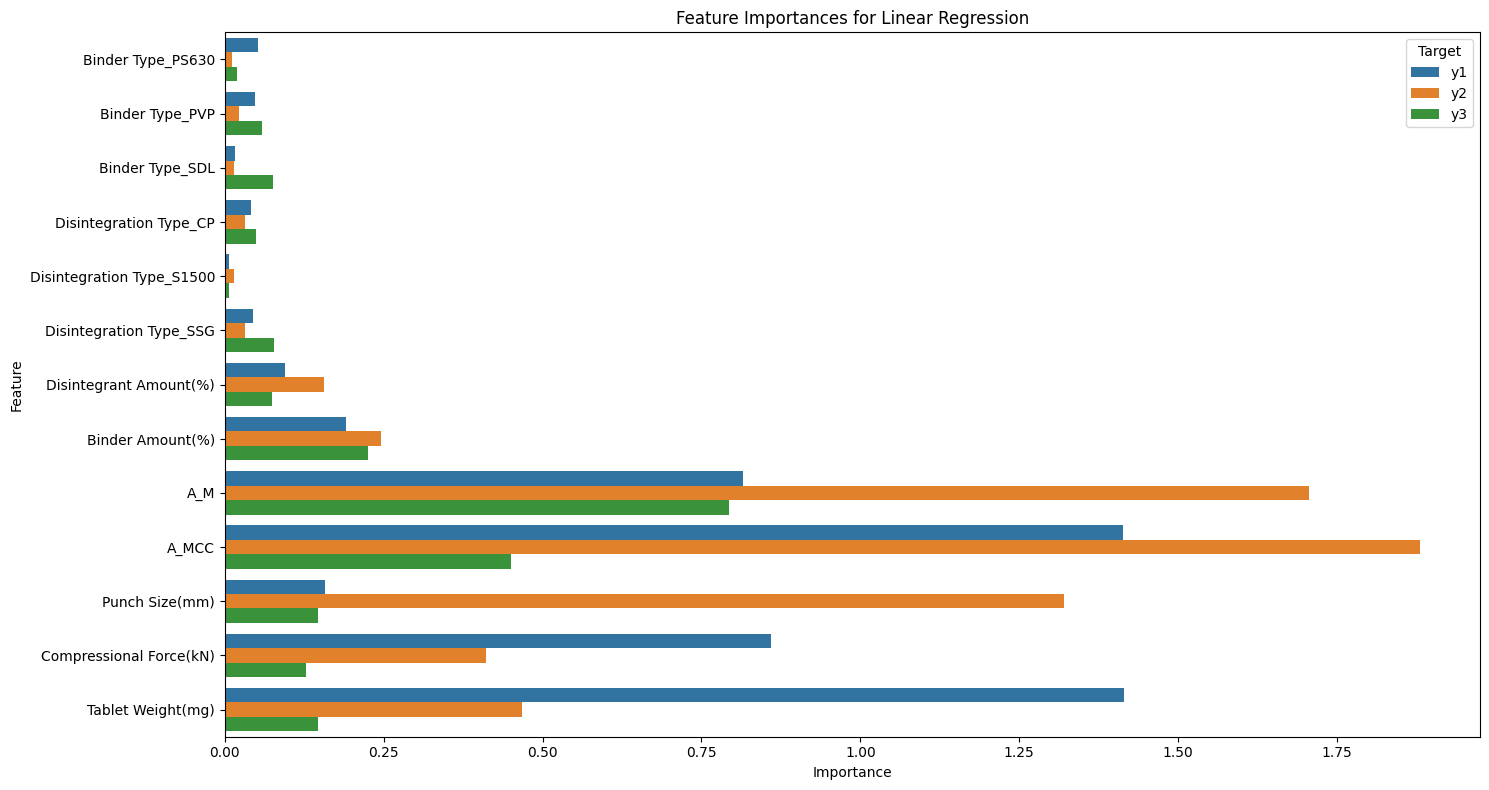

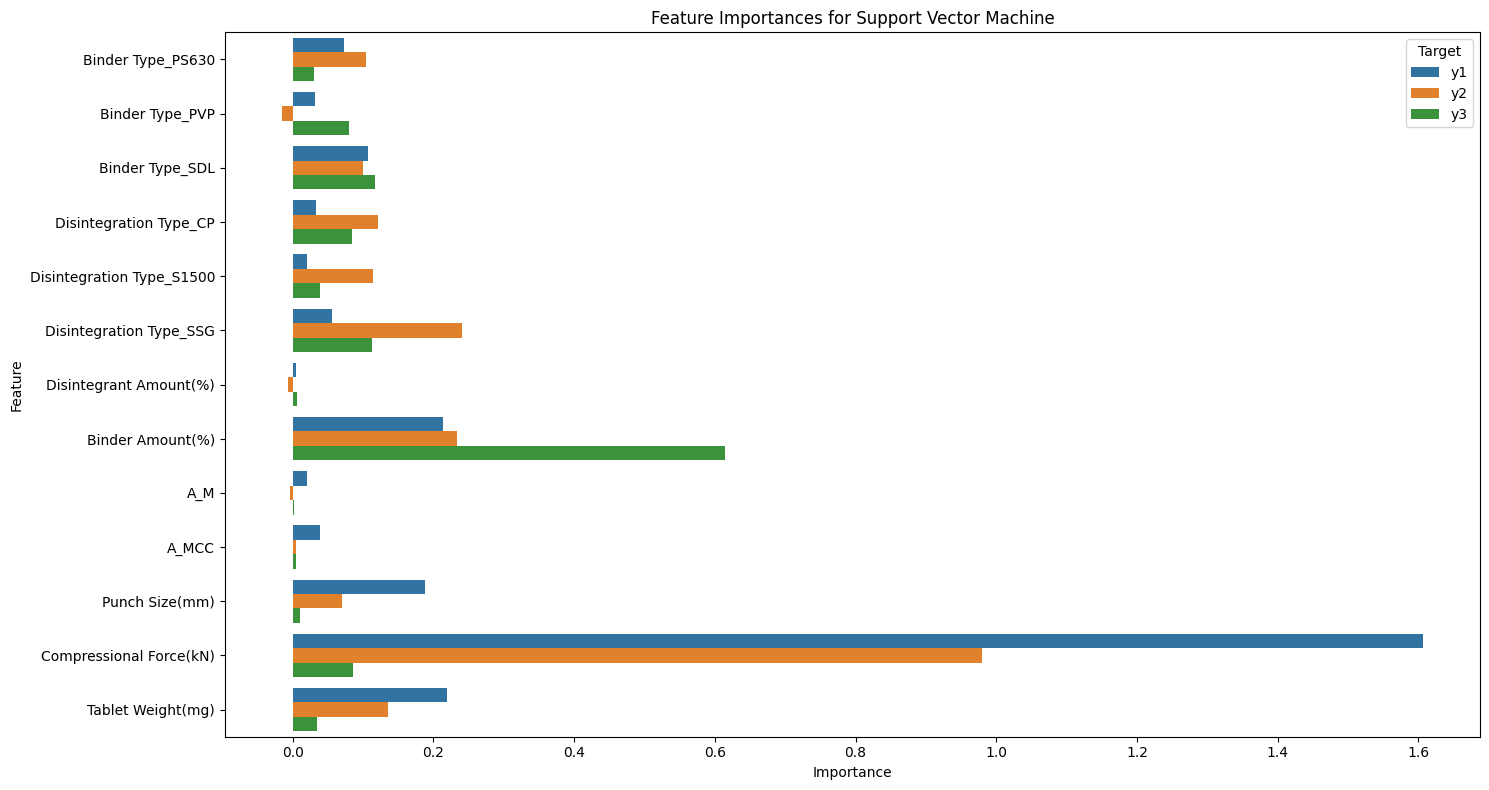

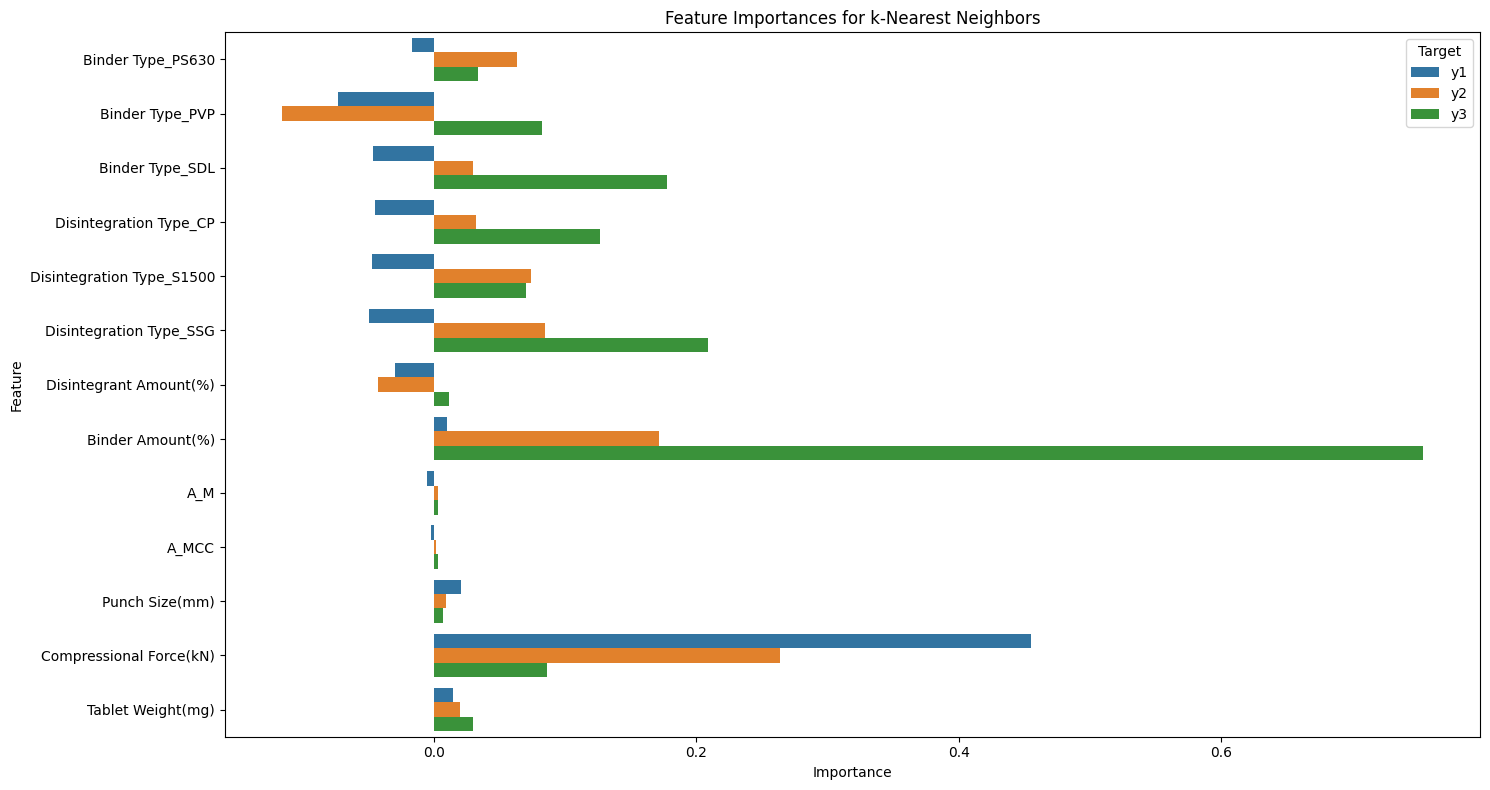

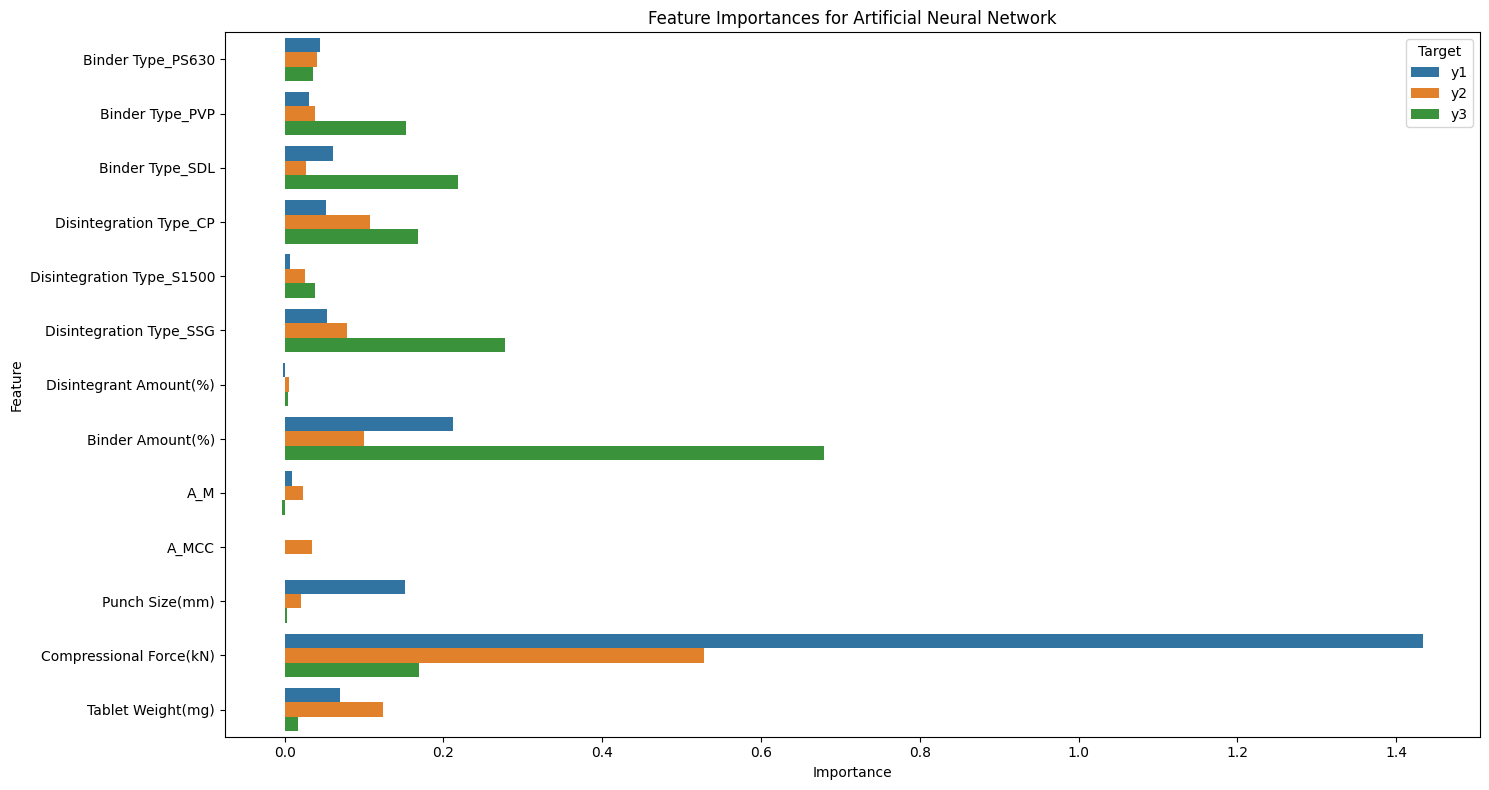

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance

# Function to calculate and visualize feature importances for all targets
def calculate_and_save_feature_importances(models, model_names, X_train, X_test, y_trains, y_tests, target_names):
    for model, model_name in zip(models, model_names):
        feature_importance_dfs = []

        for y_train, y_test, target_name in zip(y_trains, y_tests, target_names):
            model.fit(X_train, y_train.values.ravel())
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)

            # Calculate feature importances for Linear Regression model
            if isinstance(model, LinearRegression):
                feature_importances = np.abs(model.coef_).flatten()
            else:
                feature_importances = None

            if feature_importances is None:
                # Use permutation importance for models that don't provide feature importances
                perm_importance = permutation_importance(model, X_test, y_test.values.ravel(), n_repeats=10, random_state=42)
                feature_importances = perm_importance.importances_mean

            feature_names = X_train.columns
            feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances, 'Target': target_name})
            feature_importance_dfs.append(feature_importance_df)

        # Combine feature importance DataFrames for y1, y2, and y3
        combined_feature_importance_df = pd.concat(feature_importance_dfs)

        # Visualization of feature importances
        plt.figure(figsize=(15, 8))
        sns.barplot(x='Importance', y='Feature', hue='Target', data=combined_feature_importance_df)
        plt.title(f'Feature Importances for {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.legend(title='Target')
        plt.tight_layout()
        plt.savefig(f'Combined_Feature_Importances_{model_name}.tiff', dpi=600, format='tiff')
        plt.show()

# Example datasets (replace with actual data loading and preprocessing)
# Assuming X_encoded, y1, y2, y3 are defined and preprocessed
# Split the data
X_train, X_test, y1_train, y1_test = train_test_split(X_encoded, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(X_encoded, y2, test_size=0.2, random_state=42)
_, _, y3_train, y3_test = train_test_split(X_encoded, y3, test_size=0.2, random_state=42)

# Models for y1, y2, and y3
models = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor(max_iter=500)
]

model_names = ['Linear Regression', 'Support Vector Machine', 'k-Nearest Neighbors', 'Artificial Neural Network']
target_names = ['y1', 'y2', 'y3']

# y_train and y_test lists
y_trains = [y1_train, y2_train, y3_train]
y_tests = [y1_test, y2_test, y3_test]

# Loop through all models and visualize combined feature importances for y1, y2, and y3
calculate_and_save_feature_importances(models, model_names, X_train, X_test, y_trains, y_tests, target_names)


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import load_model
import joblib
import tensorflow as tf
from tensorflow.keras.utils import get_custom_objects

# Define the custom loss function
def r_squared_loss(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(y_true - y_pred))
    total = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    r2 = 1 - residual / (total + tf.keras.backend.epsilon())
    return r2

# Define the custom metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return (1 - SS_res/(SS_tot + tf.keras.backend.epsilon()))

# Register the custom loss and metric functions
get_custom_objects().update({'r_squared_loss': r_squared_loss, 'r_squared': r_squared})

# Load your data
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.'], axis=1)

# Separate features and target variables
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2]  # Binder Type and Disintegrant type
X2 = X.iloc[:, 2:4].apply(pd.to_numeric, errors='coerce') / 10  # Disintegrant and binder amount
X3 = X.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce') / 100  # Mannitola and MCC amount
X4 = X.iloc[:, 6:7].apply(pd.to_numeric, errors='coerce') / 20  # Punch Size
X5 = X.iloc[:, 7:8].apply(pd.to_numeric, errors='coerce') / 10  # Compression Force
X6 = X.iloc[:, 8:9].apply(pd.to_numeric, errors='coerce') / 1000  # Tablet Weight

y1 = df.iloc[:, 9:10].apply(pd.to_numeric, errors='coerce') / 20  # Hardness(kg/cm2)
y2 = df.iloc[:, 10:11].apply(pd.to_numeric, errors='coerce') / 10  # % Friability
y3 = df.iloc[:, 11:12].apply(pd.to_numeric, errors='coerce') / 1000  # Disintegration Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse_output=False)
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2, X3, X4, X5, X6], axis=1)


# Save the fitted one-hot encoder for future use
joblib.dump(onehot_encoder, 'onehot_encoder.pkl')

# Load your pre-trained models
model_y1 = load_model('y1.hdf5', custom_objects={'r_squared_loss': r_squared_loss, 'r_squared': r_squared})
model_y2 = load_model('y2.hdf5', custom_objects={'r_squared_loss': r_squared_loss, 'r_squared': r_squared})
model_y3 = load_model('y3.hdf5', custom_objects={'r_squared_loss': r_squared_loss, 'r_squared': r_squared})

# Function to preprocess test data
def preprocess_test_data(test_df, encoder_path='onehot_encoder.pkl'):
    # Load the fitted encoder
    onehot_encoder = joblib.load(encoder_path)

    # Drop columns not present during training
    test_df = test_df.drop(['Batch No.'], axis=1, errors='ignore')

    # Ensure all necessary columns are present in the test data
    missing_cols = set(X.columns) - set(test_df.columns)
    for col in missing_cols:
        test_df[col] = 0

    # Preprocess the test data
    X_test = test_df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
    X1_test = X_test.iloc[:, 0:2]  # Binder Type and Disintegrant type
    X2_test = X_test.iloc[:, 2:4].apply(pd.to_numeric, errors='coerce') / 10  # Disintegrant and binder amount
    X3_test = X_test.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce') / 100  # Mannitola and MCC amount
    X4_test = X_test.iloc[:, 6:7].apply(pd.to_numeric, errors='coerce') / 20  # Punch Size
    X5_test = X_test.iloc[:, 7:8].apply(pd.to_numeric, errors='coerce') / 10  # Compression Force
    X6_test = X_test.iloc[:, 8:9].apply(pd.to_numeric, errors='coerce') / 1000  # Tablet Weight

    # Perform one-hot encoding on X1_test
    X1_test_encoded = onehot_encoder.transform(X1_test)

    # Create a DataFrame with the encoded columns
    X1_test_encoded_df = pd.DataFrame(X1_test_encoded, columns=onehot_encoder.get_feature_names_out(X1_test.columns))

    # Concatenate the encoded columns with the remaining columns in X
    X_test_encoded = pd.concat([X1_test_encoded_df, X2_test, X3_test, X4_test, X5_test, X6_test], axis=1)

    return X_test_encoded

# Example test data
test_df = pd.read_csv('/content/Test.csv')

# Preprocess the test data
X_test_encoded = preprocess_test_data(test_df)

# Make predictions
y1_pred = model_y1.predict(X_test_encoded)
y2_pred = model_y2.predict(X_test_encoded)
y3_pred = model_y3.predict(X_test_encoded)

# Optionally, rescale the predictions back to their original scales
y1_pred_rescaled = y1_pred * 20
y2_pred_rescaled = y2_pred * 10
y3_pred_rescaled = y3_pred * 1000

print(y1_pred_rescaled, y2_pred_rescaled, y3_pred_rescaled)


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 74ms/step
[[0.       ]
 [0.       ]
 [2.3627913]
 [2.616861 ]
 [0.       ]
 [2.9833312]] [[1.7003165 ]
 [1.7075665 ]
 [0.9065243 ]
 [0.95522857]
 [0.8766255 ]
 [0.2537569 ]] [[ 67.606766]
 [ 96.60638 ]
 [182.40643 ]
 [163.23723 ]
 [158.13878 ]
 [163.89749 ]]


In [23]:
print(X_test_encoded)
print(X_encoded)

   Binder Type_PS630  Binder Type_PVP  Binder Type_SDL  \
0                0.0              1.0              0.0   
1                1.0              0.0              0.0   
2                0.0              0.0              1.0   
3                0.0              1.0              0.0   
4                0.0              0.0              0.0   
5                0.0              0.0              1.0   

   Disintegration Type_CP  Disintegration Type_S1500  Disintegration Type_SSG  \
0                     0.0                        0.0                      1.0   
1                     0.0                        0.0                      0.0   
2                     1.0                        0.0                      0.0   
3                     0.0                        1.0                      0.0   
4                     0.0                        0.0                      0.0   
5                     0.0                        1.0                      0.0   

   Disintegrant Amount(%)